In [1]:
# Assignments

In [25]:
import numpy as np

In [26]:
df=np.array([[1,2,3,4,5],[6,7,8,9,10]])
df=np.array([1,2,3,4,5,6,7,8,9])
print(df[4:])

[5 6 7 8 9]


In [27]:
str1="DYnative"
print(str1[1:4])

Yna


# My views about the problem statement:

 My views about the problem statement:m
 The Problem statement requires a ML model that provides a good approximation of the salary 
 provided different parameters, such as city,previous package,College etc. 
 The Company is a consultation firm so we have to provide the model with highest accuracy. 

# Approach To Solve the Task

Since the dataset is provided in raw form, We will following standard convention to provide a suitable ML model for the specific Task:
Step 1 :Data Preprocessing 
Step 2 :Statistical Analysis 
Step 3 :Data Analysis 
Step 4 :Model Selection 
Step 5 :Evaluation 

# Different ML Models that I have selected:


 1. Multiple Linear Regression Model
 2. KNN Regression Model
 3. Decision Tree Regression Model
 4. Ensemble Regression Model

# Best Model according to my analysis:

 Best Model according to my analysis:
 Ensemble Regression Model performs the best because ensemble regression is based on the idea 
 of using multiple individual regression models to make predictions. 
 It, by using several models, reduces overfitting and improves predictive performance. 
 They can also handle complex relationships, outliers, and noisy data and are often 
 among the top performers in many predictive tasks, but disadvantage is that they can be 
 computationally intensive and may require more tuning.

# To further improve the model's performance even further, We can do the following:


 1. Standardization or normalization 
 2. Cross-Validation
 3. try other algorithms like Gradient Boosting
 4. Regularization (Regularization techniques like L1 and L2 regularization)
 5. Ensembling Strategies (Experiment with different ensembling strategies, 
     such as averaging predictions from multiple models or using stacking/blending methods. )

# Code

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

## Data Preprocessing

In [29]:
col=pd.read_csv("Colleges.csv")
df=pd.read_csv("ML case Study.csv")
city=pd.read_csv("cities.csv")

In [30]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [31]:
Tier1=col["Tier 1"].to_list()
Tier2=col["Tier 2"].to_list()
Tier3=col["Tier 3"].to_list()

In [32]:
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace=True)
    if item in Tier2:
        df["College"].replace(item,2,inplace=True)
    if item in Tier3:
        df["College"].replace(item,3,inplace=True)
        

In [33]:
tier1_city=city["Metrio City"].to_list()
tier2_city=city["non-metro cities"].to_list()

In [34]:
for item in df.City:
    if item in tier1_city:
        df["City"].replace(item,1,inplace=True)
    if item in tier2_city:
        df["City"].replace(item,0,inplace=True)

In [35]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


In [36]:
for x in df.Role: #Can have done this with pd.getdummies() too
    if x=="Manager":
        df["Role"].replace(x,1,inplace=True)
    if x=="Executive":
        df["Role"].replace(x,0,inplace=True)

In [37]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,1,55523.0,3,66,19,71406.58
1,2,0,0,57081.0,1,84,18,68005.87
2,3,0,0,60347.0,2,52,28,76764.02
3,3,0,0,49010.0,2,81,33,82092.39
4,1,0,0,57879.0,4,74,32,73878.10


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   int64  
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 99.4 KB


## Data Analysis

In [39]:
df.describe()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,0.206419,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,0.404862,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,0.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,0.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


C:\Users\Zeul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CTC', ylabel='Density'>

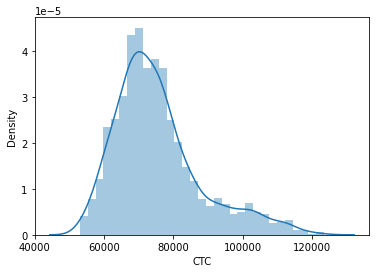

In [40]:
sns.distplot(df["CTC"])

C:\Users\Zeul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CTC'>

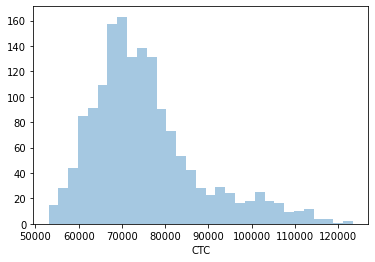

In [41]:
sns.distplot(df["CTC"],kde=False)

C:\Users\Zeul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Role', ylabel='count'>

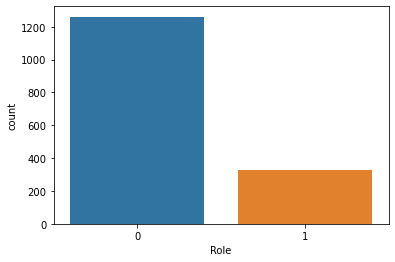

In [42]:
sns.countplot(df["Role"])

C:\Users\Zeul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='count'>

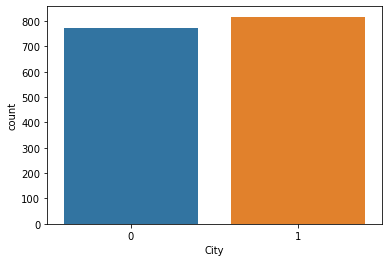

In [43]:
sns.countplot(df["City"])

C:\Users\Zeul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


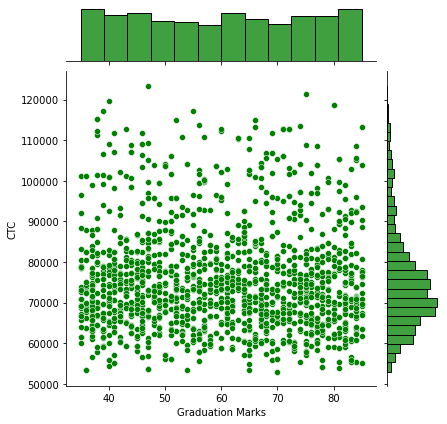

In [44]:
sns.jointplot(df["Graduation Marks"],df["CTC"],color="Green")

C:\Users\Zeul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Role', ylabel='CTC'>

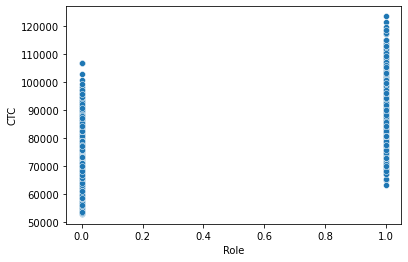

In [45]:
sns.scatterplot(df["Role"],df["CTC"])

C:\Users\Zeul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previous CTC', ylabel='CTC'>

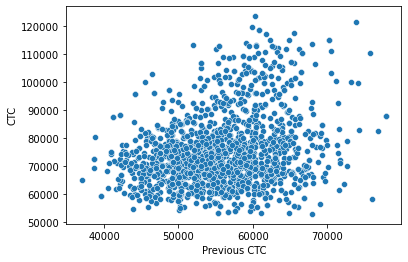

In [46]:
sns.scatterplot(df["Previous CTC"],df["CTC"])

C:\Users\Zeul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Graduation Marks', ylabel='CTC'>

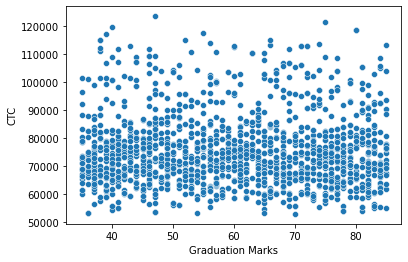

In [47]:
sns.scatterplot(df["Graduation Marks"],df["CTC"])

In [48]:
df.corr() #To check correlation and Inter-Correlation

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
College,1.000000,-0.014946,-0.014749,0.041979,-0.055060,0.003539,0.011752,-0.029592
City,-0.014946,1.000000,-0.048671,0.004644,0.051670,-0.018616,-0.023613,-0.020365
Role,-0.014749,-0.048671,1.000000,0.012321,-0.017150,0.017858,-0.026751,0.621311
Previous CTC,0.041979,0.004644,0.012321,1.000000,0.005756,-0.032976,0.119163,0.258000
Previous job change,-0.055060,0.051670,-0.017150,0.005756,1.000000,0.019267,0.023488,0.011370
Graduation Marks,0.003539,-0.018616,0.017858,-0.032976,0.019267,1.000000,-0.057061,-0.005450
EXP (Month),0.011752,-0.023613,-0.026751,0.119163,0.023488,-0.057061,1.000000,0.301115
CTC,-0.029592,-0.020365,0.621311,0.258000,0.011370,-0.005450,0.301115,1.000000


## Model Selection

### 1. Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model=LinearRegression()

In [51]:
x=df.loc[:,df.columns!="CTC"] #Multiple Linear Regression Model
y=df["CTC"]

In [52]:
model.fit(x,y)

LinearRegression()

In [53]:
model.intercept_,model.coef_ #Intercept and Coefficients values

(38421.10980689701,
 array([-4.81514705e+02,  3.80830787e+02,  1.94874279e+04,  4.10090279e-01,
         1.26565295e+02,  6.23621203e+00,  2.61344394e+02]))

In [54]:
model.predict(x)

array([85471.78017837, 66221.04980935, 69619.3404014 , ...,
       62202.63154825, 67536.37870119, 81066.68406194])

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
trainX,testX,trainY,testY=train_test_split(x,y,test_size=0.2,random_state=0)

In [57]:
trainX.shape,testX.shape,trainY.shape,testY.shape

((1271, 7), (318, 7), (1271,), (318,))

In [58]:
model=LinearRegression()

In [59]:
model.fit(trainX,trainY)

LinearRegression()

In [60]:
trainY_predict=model.predict(trainX)
testY_predict=model.predict(testX)


In [61]:
from sklearn.metrics import r2_score

In [62]:
score=r2_score(testY,testY_predict)

#### Evaluation

In [63]:
r2_score(trainY,trainY_predict)

0.5331293335456955

In [64]:
print("Accuracy Score on Test Data:",score*100,"%"  )

Accuracy Score on Test Data: 53.55989894790055 %


### Ridge Regression

In [65]:
from sklearn import preprocessing

In [66]:
scalar=preprocessing.StandardScaler().fit(trainX)

In [67]:
x_train_s=scalar.transform(trainX)

In [68]:
x_test_s=scalar.transform(testX)

In [69]:
from sklearn.linear_model import Ridge

In [70]:
lm_r=Ridge(alpha=0.5)

In [71]:
lm_r.fit(x_train_s,trainY)

Ridge(alpha=0.5)

#### Evaluation

In [72]:
r2_score(testY,lm_r.predict(x_test_s))

0.5355848845406523

In [73]:
from sklearn.model_selection import validation_curve
param_range=np.logspace(-2,8,100)


In [74]:
train_scores,test_score=validation_curve(Ridge(),x_train_s,trainY,param_name="alpha",
                                         param_range=param_range,scoring="r2")

In [75]:
train_mean=np.mean(train_scores,axis=1)

In [76]:
test_mean=np.mean(test_score,axis=1)

In [77]:
max(test_mean)

0.5258291929838951

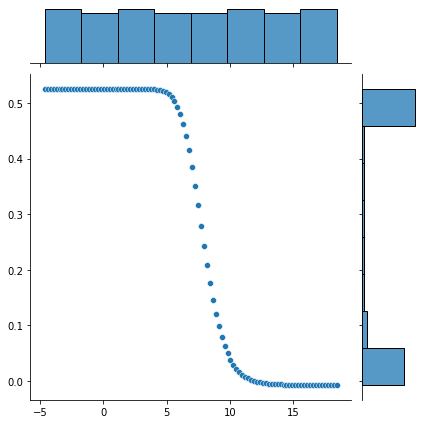

In [78]:
sns.jointplot(x=np.log(param_range),y=test_mean)

In [79]:
np.where(test_mean==max(test_mean))

(array([26], dtype=int64),)

In [80]:
lm_r_best=Ridge(alpha=param_range[26])

In [81]:
lm_r_best.fit(x_train_s,trainY)

Ridge(alpha=4.229242874389499)

#### Evalutation

In [82]:
r2_score(testY,lm_r_best.predict(x_test_s))

0.5354754126724077

In [83]:
r2_score(trainY,lm_r_best.predict(x_train_s))

0.5331238227310131

### KNN Regression

In [84]:
from sklearn.neighbors import KNeighborsRegressor

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
scalar=preprocessing.StandardScaler().fit(trainX)
x_train_s=scalar.transform(trainX)
scaler=preprocessing.StandardScaler().fit(testX)
x_test_s=scalar.transform(testX)

In [87]:
knn=KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train_s,trainY)

KNeighborsRegressor(n_neighbors=1)

In [88]:
trainY_pred=model.predict(trainX)
testY_pred=model.predict(testX)

In [89]:
from sklearn.metrics import mean_squared_error,r2_score

#### Evalutation

In [90]:
mean_squared_error(testY,testY_pred)

68909870.69952613

In [91]:
r2_score(trainY,trainY_pred)

0.5331293335456955

In [92]:
r2_score(testY,testY_pred)

0.5355989894790055

### Decision Tree Regression

In [93]:
from sklearn import tree
model=tree.DecisionTreeRegressor(max_depth=3)

In [94]:
model.fit(trainX,trainY)

DecisionTreeRegressor(max_depth=3)

In [95]:
trainY_pred=model.predict(trainX)
testY_pred=model.predict(testX)

In [96]:
from sklearn.metrics import mean_squared_error,r2_score

#### Evalutation

In [97]:
r2_score(trainY,trainY_pred)

0.6137194061789908

In [98]:
r2_score(testY,testY_pred)

0.5927831611924907

In [99]:
import matplotlib.pyplot as plt

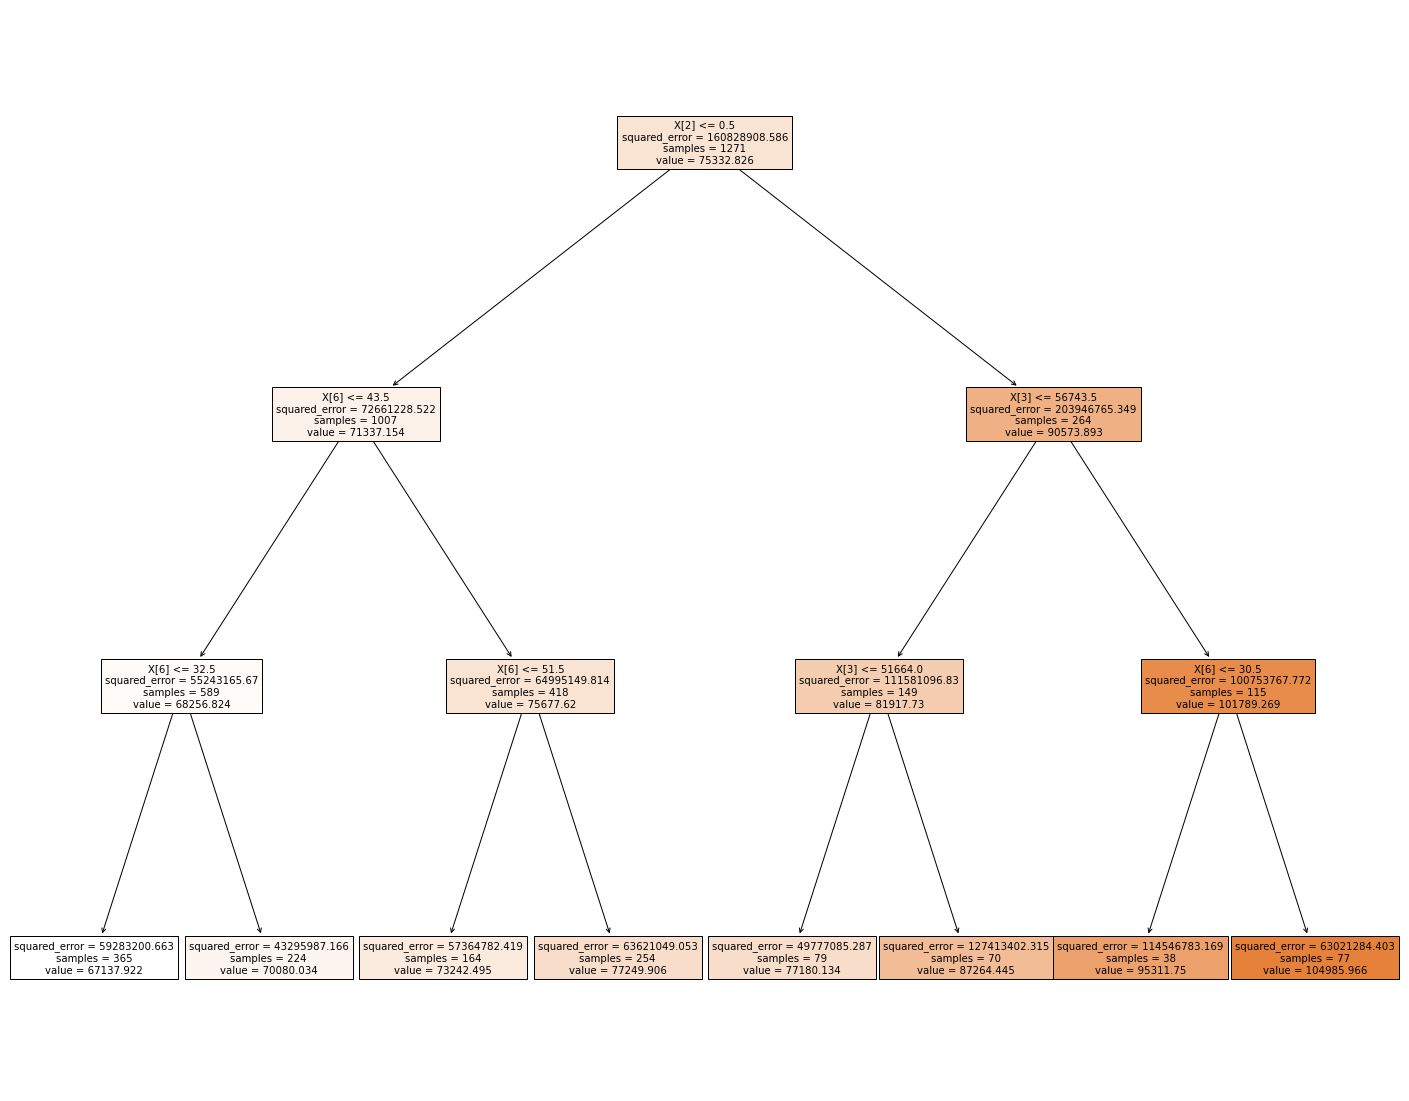

In [100]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,filled=True)

### Ensemble (Random Forest)

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [110]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [111]:
n_estimators = 100
max_depth = 5
random_state = 42

In [112]:
ensemble = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

In [113]:
ensemble.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [117]:
y_pred = ensemble.predict(X_test)

#### Evalutation

In [115]:
mse = mean_squared_error(y_test, y_pred)

In [116]:
print("Mean Squared Error:", mse)

Mean Squared Error: 72646044.01659445
